In [1]:
"""
1.데이터준비 일의80%차지 (전처리는 나중에는 본인이 직접) 이게 젤괴로움
  주업무80%: 데이터수집, 결측치처리, 이상치처리, 정규화, 주성분분석이나 차원축소 등,
  카테고리화 원핫인코딩 등
  아래 분석은 하다보면 같은코드로 하게돼있음.
2.데이터셋을 2개로 나눠, 훈련셋, 테스트셋으로 나눈다.
  (전부다 학습하면 과대적합인지 과소적합인지 미래예측력이 있는지 알수없어서,
  6:4 7:3 8:2 정도로 나눠서 테스트가능하도록, 훈련셋에만 맞추면안된다.
  일반화를 위해서 쪼개야한다.)
3. 알고리즘(Knn이웃 알고리즘,분류에서 가장 심플한 알고리즘)을 선택.
   분류알고리즘(로지스틱회귀분석, 서포트벡터머신, 의사결정트리,랜덤포레스트,그라디언트부스팅..)
   을 선택해 학습. 각 알고리즘마다 성능(학습더 잘하게) 올릴수있는 하이퍼파라미터가 있는데
   이걸 찾아내는 과정이 필요
4.예측
5.성능평가

"""

'\n1.데이터준비 일의80%차지 (전처리는 나중에는 본인이 직접) 이게 젤괴로움\n  주업무80%: 데이터수집, 결측치처리, 이상치처리, 정규화, 주성분분석이나 차원축소 등,\n  카테고리화 원핫인코딩 등\n  아래 분석은 하다보면 같은코드로 하게돼있음.\n2.데이터셋을 2개로 나눠, 훈련셋, 테스트셋으로 나눈다.\n  (전부다 학습하면 과대적합인지 과소적합인지 미래예측력이 있는지 알수없어서,\n  6:4 7:3 8:2 정도로 나눠서 테스트가능하도록, 훈련셋에만 맞추면안된다.\n  일반화를 위해서 쪼개야한다.)\n3. 알고리즘(Knn이웃 알고리즘,분류에서 가장 심플한 알고리즘)을 선택.\n   분류알고리즘(로지스틱회귀분석, 서포트벡터머신, 의사결정트리,랜덤포레스트,그라디언트부스팅..)\n   을 선택해 학습. 각 알고리즘마다 성능(학습더 잘하게) 올릴수있는 하이퍼파라미터가 있는데\n   이걸 찾아내는 과정이 필요\n4.예측\n5.성능평가\n\n'

In [2]:
from sklearn.datasets import load_iris

data = load_iris() #Bunch라는 클래스타입
print(data.keys())

print("타겟이름", data['target_names'])
print("파일명", data['filename'])
print("데이터설명")
print(data["DESCR"])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
타겟이름 ['setosa' 'versicolor' 'virginica']
파일명 iris.csv
데이터설명
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(112, 4)
(38, 4)


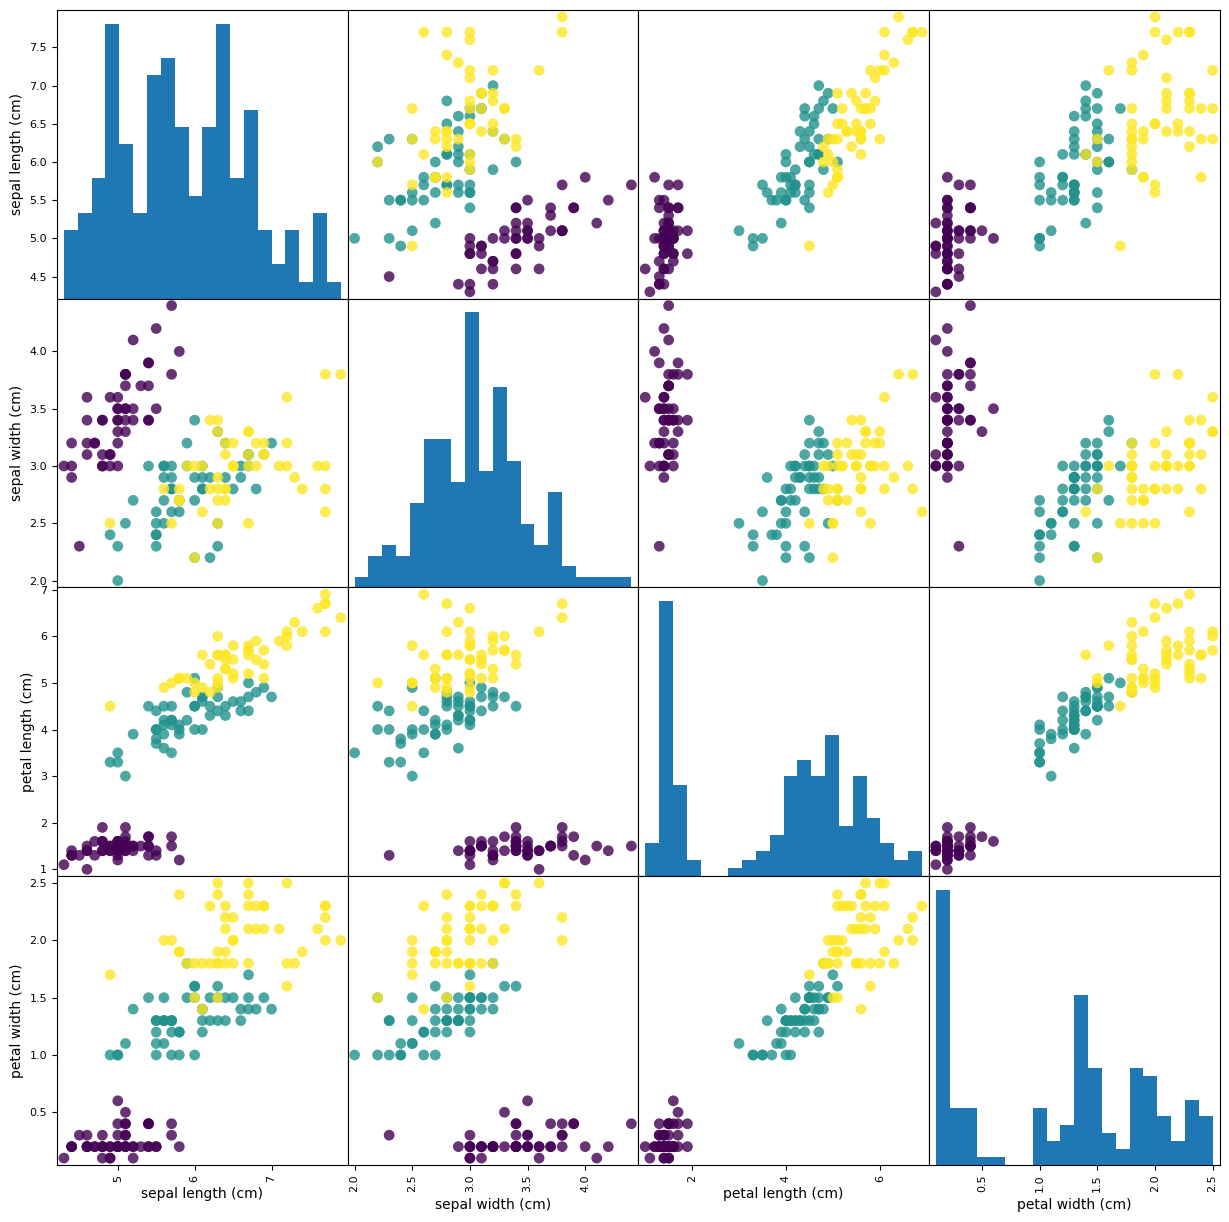

In [3]:
#데이터 나누기
X = data["data"]  #ndarray 2차원배열
y = data["target"]#ndarray 1차원배열

print(X[:10])
print(y)

#데이터 랜덤섞어서 70%추출
from sklearn.model_selection import train_test_split
#tuple로 반환, random_state인자가 seed역할, 
#계속 같은데이터내보내려면 이값고정, 얘바꾸면 데이터바뀜
#test_size=0.3 그 비율대로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)
print(X_train.shape)
print(X_test.shape)

#데이터 전체 확인하기 위해서, 산점행렬(특성4개면 각 틍성으로만 그릴수 있어서 차트4x4=16개)
#특성 10roehlaus 10x10 = 100개 차트 만들어진다.

#scatter_matrix 차트가 직접 노가다로 그릴수도 이씨고 DataFrame
#sjavkdl qodufdmf -> DataFrame으로 바꾼다
import pandas as pd
iris_df = pd.DataFrame(X, columns=data['feature_names']) #numpy배열과 컬럼명으로
import matplotlib.pyplot as plt
#모든차트는 이거 꼭 필요(요즘은 시본차트 핫)

#PPT-269p.붓꽃 산포도그리기
pd.plotting.scatter_matrix( iris_df,
                           c=y, #각점의 색상지정. 0,1,2 각자 다른색
                           figsize=(15,15), #차트크기단위는 inch
                           marker='o',
                           hist_kwds={'bins':20}, #대각선의 히스토그램 구간개수
                           s=60, #점의 크기
                           alpha=0.8) #투명도, 1불투명, 0으로갈수록 투명
plt.show()

In [4]:
#250707 am11시
#Knn이웃알고리즘

#이웃개수 지정가능. 대부분 홀수개 지정
#회귀분류 둘다가능
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3) #이웃개수3개, 바꿔가며 돌려봐야함.
#학습시작
#학습한내용은 모델자체가 갖고있고 충분히 모델의 하이퍼파라미터가 지정돼서
#최대한의 학습효과를 얻었다고 생각하면 모델 저장해놓고 나중에 불러와서 다시 쓸수있다.

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
#예측하기
y_pred = model.predict(X_test) #테스트셋으로 예측데이터 반환
#본래 테스트셋인 y_test와 비교
print(y_pred)
print(y_test)

#평가하기
print("훈련셋평가", model.score(X_train, y_train))
print("테스트셋평가", model.score(X_test, y_test))

#클래스 이름으로 출력
class_names = list(data['target_names'])
for i, j in zip(y_pred, y_test):
    print("예측 :{:20s} 실제 :{:20s}".format(class_names[i], class_names[j]))

[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0 1 2 0 1 1 0 0
 0]
[1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0 1 2 0 2 1 0 0
 0]
훈련셋평가 0.9642857142857143
테스트셋평가 0.9736842105263158
예측 :versicolor           실제 :versicolor          
예측 :versicolor           실제 :versicolor          
예측 :virginica            실제 :virginica           
예측 :setosa               실제 :setosa              
예측 :versicolor           실제 :versicolor          
예측 :setosa               실제 :setosa              
예측 :setosa               실제 :setosa              
예측 :setosa               실제 :setosa              
예측 :versicolor           실제 :versicolor          
예측 :virginica            실제 :virginica           
예측 :versicolor           실제 :versicolor          
예측 :setosa               실제 :setosa              
예측 :virginica            실제 :virginica           
예측 :versicolor           실제 :versicolor          
예측 :setosa               실제 :setosa              
예측 :versicolor           실제 :versicolor  